# Logistische Regression  (from a neural networks point of view) #

##**1 - Imports**##

In [23]:
import numpy as np                  # Scientific computing
import matplotlib.pyplot as plt     # plot graphs
import matplotlib.lines as mlines
import sklearn.datasets
import h5py                         # work with dataset stored in H5 files
import scipy                        # use your own pictures
from PIL import Image               # use your own pictures
from scipy import ndimage
from scipy.special import expit     # expit is the sigmoid function

%matplotlib inline
np.random.seed(7)

##**2 - `sklearn` Dataset & Preprocessing**##
Input, Output: X1_, Y1_

Number of features: n = 2

Number of instances/samples: m = 100

In [24]:
# Generating random dataset with sklearn
X1_raw, Y1_raw = sklearn.datasets.make_classification(n_samples = 100, n_features=2, 
                            n_redundant=0, n_informative=1,
                            n_clusters_per_class=1)


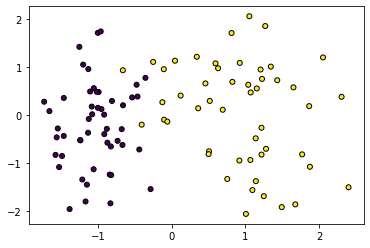

In [25]:
# Visualize the data:
fig, ax = plt.subplots()
ax.scatter(X1_raw[:, 0], X1_raw[:, 1], marker='o', c=Y1_raw, s=25, edgecolor='k')
plt.show()

In [26]:
# Data is already normalized, no need to rescale points...

# Figure out the dimension and shapes
# print(X1)   # print all coordinates
# print(Y1)   # print all labels
print("Shape of X1 is " + str(X1_raw.shape))
print("Shape of Y1 is " + str(Y1_raw.shape))
# Example of a point
index = 1
print("Point #" + str(index) + " is " + str(X1_raw[index,:]))
print("Class #" + str(index) + " is " + str(Y1_raw[index]))

Shape of X1 is (100, 2)
Shape of Y1 is (100,)
Point #1 is [-0.82956384 -1.83242597]
Class #1 is 0


In [27]:
# We need one Datapoint/Example per column 
# --> reshape X1 to (2, 100)
# --> reshape Y1 to (1, 100)
X1 = X1_raw.reshape(X1_raw.shape[1], X1_raw.shape[0])  #(2, 100)
Y1 = Y1_raw.reshape(1, Y1_raw.shape[0])
print(X1.shape)
print(Y1.shape)
print(Y1)

### Q : What is the difference between the shapes (100,) and (1,100) ?

(2, 100)
(1, 100)
[[1 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 1 1 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 1 1 1
  1 1 0 1 1 1 1 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 1 0 1 1 1
  1 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1 1 0 1 0 1 0]]


In [28]:
# Dimensions of the dataset
n = X1.shape[0]      # number of features
m = X1.shape[1]      # number of examples/datapoints
print(n)
print(m)

2
100


In [29]:
# Extend every input by x_0 = 1
X1_ = np.vstack((np.ones((1,100)), X1))
Y1_ = Y1
print(X1_.shape)
print(X1_[:,:4])

(3, 100)
[[ 1.          1.          1.          1.        ]
 [ 1.1417588  -0.47841788 -0.82956384 -1.83242597]
 [ 1.22030335 -0.25831633 -0.46187728  0.39154569]]


In [30]:
# Using randomly generated sklearn.dataset from above
X = X1_
Y = Y1_

# Q: What are the dimensions of the dataset?
# Q: What is the number of features and the number of examples/datapoints?
n = X.shape[0] - 1  # number of features
m = X.shape[1]      # number of examples/datapoints

##**3 - Remember: Logistic Regression for one example $x$**##



###**The Forward Pass**###
$$z = w^Tx \tag{1}$$
$$\hat{y} = a = sigmoid(z)\tag{2}$$ 


###**The Loss**###
$$ \mathcal{L}(a, y) =  - y  \log(a) - (1-y)  \log(1-a)\tag{3}$$


###**The Cost is the average loss over all examples $x^{(i)} ... x^{(m)}$**###
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{4}$$


##**4 - Implement your functions**##

Complete the function implementations below. Replace the "None" instances with your code.

###**Parameter Initialization**###



In [31]:
def init_parameters(n):
  np.random.seed(2)         # to always get the same "random" numbers
  # -- start of your code
  w = None 
  # -- end of your code

  assert(w.shape == (n+1,1))
  return (w)

###**One Forward Pass**###
$A = \sigma(w^T X) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$

In [32]:
def forward_pass(X, w):
  # Hint: use scipy.special.expit as sigmoid function
  # -- start of your code
  A = None
  # -- end of your code
  
  assert(A.shape == (1, X.shape[1]))
  return A

###**Calculating the Loss (Cross-Entropy Loss)**###

$$\mathcal{L}(A,Y) = -Y\log(A)-(1-Y)\log(1-A)\tag{5}$$

In [33]:
def calculate_loss(A,Y):

  # -- start of your code
  L = None
  # -- end of your code
  
  assert(L.shape == (1,m))
  return L

###**Calculating the Cost**###

Averaging over the Losses: 

$$ J = \frac{1}{m} np.sum(L)\tag{6}$$
<br>
$$ J(A,Y) = \frac{1}{m}np.sum(-Y\log(A)-(1-Y)\log(1-A))\tag{7}$$

In [34]:
def calculate_cost(loss):

  # -- start of your code
  cost = None
  # -- end of your code
  
  assert(isinstance(cost, float) or isinstance(cost, int))
  cost = np.squeeze(cost)
  assert(cost.shape == ())

  return(cost)

###**Calculating the Gradients**###

$$ dw := \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{8}$$


In [35]:
def calculate_gradients(X, Y, A):

  # -- start of your code
  dw = None
  # -- end of your code

  assert(dw.shape == w.shape)
  return dw

###**One Optimization/Learning Step**###

$$ w = w - \alpha \ dw\tag{10}$$

In [36]:
def update_parameters(w, dw, learning_rate = 0.01):

  # -- start of your code
  w = None
  # -- end of your code

  return w

##**4 - One training step**##

Test your functions

In [37]:
# dataset
X = X1_
Y = Y1_
n = X.shape[0] - 1  # number of features
m = X.shape[1]      # number of examples/datapoints


In [ ]:
# init
w = init_parameters(n)
print(w)

In [ ]:
#forward pass
A = forward_pass(X, w)
print(A)

In [ ]:
loss = calculate_loss(A,Y)
print(loss)

In [ ]:
cost = calculate_cost(loss)
print(cost)

0.6931471805599453


In [ ]:
# calculate gradients
dw = calculate_gradients(X, Y, A)
print ("dw = " + str(dw))

In [ ]:
# update parameters

# Note: The size of the step is controlled by the learning_rate
learning_rate = 0.001

print("Parameters and Cost Before Update")
print("w = " + str(w))
print("Cost = " + str(cost))

w = update_parameters(w,dw, learning_rate)

print("\nParameters and Cost After Update")
print("w = " + str(w))

A = forward_pass(X, w)
loss = calculate_loss(A,Y)
cost = calculate_cost(loss)
print("Cost = " + str(cost))

##**5 - Gradient Descent**##

Train a logistic regression model, i.e. optimize the parameters

In [ ]:
# dataset
X = X1_
Y = Y1_
n = X.shape[0] - 1  # number of features
m = X.shape[1]      # number of examples/datapoints

# init parameters, set hyperparameters
w = init_parameters(n)
learning_rate = 0.01
num_iterations = 2000
costs = []


for i in range(num_iterations):
  # -- start of your code
  A = None
  loss = None
  cost = None

  if i % 100 == 0:
    costs.append(cost)

  dw = None
  w = None
  # -- end of your code

  if print_cost and i%100 == 0:
    print ("Cost after iteration %i: %f" %(i, cost))

In [ ]:
# Plot learning curve (with costs)
costs = np.squeeze(costs)
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(learning_rate))
plt.show()

In [ ]:
# Evaluate your model - how many points are classified correctly?

# -- start of your code

accuracy = None

# -- end of your code

print("Train accuracy: {} %".format(accuracy))